In [1]:
import pandas as pd
import numpy as np
import re
from mapping_DW import *


In [2]:
torob = pd.read_csv('DW_models_data_torob.csv')
digikala = pd.read_csv('DW_models_data_digikala.csv')

In [3]:
digikala.columns

Index(['id', 'model_code', 'price', 'ارتفاع', 'سایر ویژگی‌ها', 'عمق', 'شناسه',
       'پهنا', 'امکانات ویژه', 'سیستم ایمنی', 'تنظیمات دستگاه', 'تعداد سبد',
       'ظرفیت (نفر)', 'وزن', 'میزان صدا', 'نوع ماشین ظرفشویی',
       'متوسط میزان مصرف آب در هر شست و شو', 'تعداد قفسه های بالا',
       'تعداد برنامه های شست‌وشو', 'نمودار میزان مصرف انرژی',
       'جایگاه نگهداری'],
      dtype='object')

In [4]:
# a = torob.columns
# with open('columns.txt', 'w', encoding='utf-8') as f:
#     for i in a:
#         f.write(i + '\n')


In [5]:
import pandas as pd
import pandas as pd

def map_and_merge_columns(df, column_mappings):
    df = df.copy()  # Avoid modifying the original DataFrame

    for new_col, old_cols in column_mappings.items():
        matching_cols = [col for col in old_cols if col in df.columns]
        if matching_cols:
            if len(matching_cols) > 1:
                df[new_col] = df[matching_cols].apply(
                    lambda row: next((x for x in row if pd.notna(x) and x != ''), None), axis=1
                )
                df.drop(columns=matching_cols, inplace=True)
            else:
                df.rename(columns={matching_cols[0]: new_col}, inplace=True)

    # Select only existing columns
    existing_cols = [col for col in column_mappings.keys() if col in df.columns]
    return df[existing_cols]

digikala_n = map_and_merge_columns(digikala, digikala_mapping)
torob_n = map_and_merge_columns(torob, torob_mapping)


In [6]:
digikala_n.shape, torob_n.shape

((33, 16), (87, 16))

In [7]:
dw_concate = pd.concat([digikala_n, torob_n], ignore_index=True)

# Group by 'model_code' and fill missing values with available ones
dw = dw_concate.groupby("model_code", as_index=False).first()

In [8]:
print(dw[dw.duplicated(subset='model_code', keep=False)])


Empty DataFrame
Columns: [model_code, price, height, depth, width, safety_system, number_of_baskets, capacity, weight, noise_level, dishwasher_type, average_water_consumption_per_wash, number_of_upper_racks, number_of_washing_programs, energy_rating, storage_position]
Index: []


In [9]:
dw

,model_code,price,height,depth,width,safety_system,number_of_baskets,capacity,weight,noise_level,dishwasher_type,average_water_consumption_per_wash,number_of_upper_racks,number_of_washing_programs,energy_rating,storage_position
0,BOSCH-DW-SMS-6HMW76Q,۴۴٫۸۰۰٫۰۰۰ تومان,۸۵ سانتی‌متر,۶۰ سانتی‌متر,۶۰,سیستم قطع خودکار,سه عدد,۱۴,None,None,None,None,None,7 برنامه,None,None
1,BOSCH-DW-SMS46MI01B,۳۹٫۰۰۰٫۰۰۰ تومان,None,None,None,✅,None,None,None,44.0,بزرگ,9.5,None,None,+++A,None
2,BOSCH-DW-SMS46MW01B,۳۹٫۰۰۰٫۰۰۰ تومان,None,None,None,✅,None,None,None,44.0,بزرگ,9.5,None,None,+++A,None
3,BOSCH-DW-SMS46NI01B,۳۷٫۶۰۰٫۰۰۰ تومان,None,None,None,✅,None,None,None,44.0,بزرگ,9.5,None,None,+++A,None
4,BOSCH-DW-SMS46NI10M,۴۲٫۰۰۰٫۰۰۰ تومان,845 میلی متر,600 میلی متر,600 میلی متر,دارد,3,13 نفر,51.6 کیلوگرم,None,مبله,None,None,None,++A,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,X.VISION-DW-M150-W,۲۸٫۷۰۰٫۰۰۰ تومان,850 میلی متر,598 میلی متر,600 میلی متر,دارد,3 سبد,14 نفره,48 کیلوگرم,None,مبله,None,None,8 برنامه,None,None
91,X.VISION-DW-M160W,۳۲٫۷۰۰٫۰۰۰ تومان,85 سانتی متر,60 سانتی متر,59.8 سانتی متر,دارد,3 عدد,14,43.5 کیلوگرم,42 دسی بل,None,None,None,8+3,None,None
92,ZEROWATT-DW-FCD-3550,۲۹٫۴۴۴٫۰۰۰ تومان,۸۴۵ سانتی‌متر,۶۰۰ سانتی‌متر,None,قفل کودک,3 عدد,28 فوت,46 گرم,None,None,None,None,8,None,قفسه بالا
93,ZEROWATT-DW-ZDM-3315W,۳۲٫۰۰۰٫۰۰۰ تومان,85 سانتی متر,60 سانتی متر,60 سانتی متر,None,سه سبد,None,None,47 دسی بل,None,None,None,10 برنامه,None,None


In [10]:
threshold = 0.8
dw = dw.loc[:, dw.isnull().mean() < threshold]

In [11]:
dw.shape

(95, 14)

data cleaning

In [12]:
def convert_persian_to_english(text):
    persian_digits = "۰۱۲۳۴۵۶۷۸۹"
    english_digits = "0123456789"
    trans_table = str.maketrans(persian_digits, english_digits)
    return text.translate(trans_table)
# Apply the conversion function to the entire DataFrame
dw = dw.applymap(lambda x: convert_persian_to_english(str(x)) if isinstance(x, str) else x)


/tmp/ipykernel_70417/3328882249.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dw = dw.applymap(lambda x: convert_persian_to_english(str(x)) if isinstance(x, str) else x)


In [13]:
enery_rating_mapping = {
    "+++A": 3,
    "++A": 2,
    "A++": 2,
    "A+": 1,
    "َA++": 2,
    "A+++": 3,
    "A": 0,
    "+A": 1,
}

In [14]:
dw['energy_rating'] = dw['energy_rating'].replace(enery_rating_mapping)
dw['energy_rating'].value_counts()

/tmp/ipykernel_70417/764273650.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dw['energy_rating'] = dw['energy_rating'].replace(enery_rating_mapping)


energy_rating
2.0    29
3.0     8
1.0     3
0.0     1
Name: count, dtype: int64

In [15]:
dw.height.unique()

array(['85 سانتی\u200cمتر', None, '845 میلی متر', '845 میلیمتر',
       '850 سانتی\u200cمتر', '85 سانتی متر', '84.6 سانتی\u200cمتر',
       '846 میلی متر', '84.6 سانتی متر', '84.5 سانتی\u200cمتر',
       '84.5 سانتی متر', '845 سانتی\u200cمتر', '86 سانتی متر',
       '80 سانتی\u200cمتر', '84.5 سانتی\u200c متر', '850 میلی متر'],
      dtype=object)

In [16]:
dw['height'] = [re.findall(r'\d+\.?\d*', str(item))[0] if item is not None else None for item in dw.height]
dw['height'] = dw['height'].astype(float)
dw['height'][dw['height'].isin([845, 850,846])] = dw['height'][dw['height'].isin([845, 850])] / 10
dw.height.unique()

/tmp/ipykernel_70417/360741406.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dw['height'][dw['height'].isin([845, 850,846])] = dw['height'][dw['height'].isin([845, 850])] / 10
/tmp/ipykernel_70417/360741406.py:3: SettingWithCopyWarning

array([85. ,  nan, 84.5, 84.6, 86. , 80. ])

In [17]:
dw['depth'] = [re.findall(r'\d+\.?\d*', str(item))[0] if item is not None else None for item in dw.depth]
dw['depth'] = dw['depth'].astype(float)
dw['depth'][dw['depth'].isin([600, 610,598])] = dw['depth'][dw['depth'].isin([600, 610,598])] / 10
dw.depth.unique()

/tmp/ipykernel_70417/2108558889.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dw['depth'][dw['depth'].isin([600, 610,598])] = dw['depth'][dw['depth'].isin([600, 610,598])] / 10
/tmp/ipykernel_70417/2108558889.py:3: SettingWithCopyWarni

array([60. ,  nan, 61. , 59.8, 66. , 55. ])

In [18]:
weights_mapping = {
    None: "",
    '51.6 کیلوگرم': 51.6,
    '54.2 کیلوگرم': 54.2,
    '57.4 کیلوگرم':57.4,
    '51.5 کیلوگرم': 51.5,
    54.9: 54.9,
    '54 کیلوگرم': 54,
    '61 کیلوگرم': 61,
    '62 کیلوگرم':62,
    56.9: 56.9,
    '56.4 کیلوگرم': 56.4,
    '46000 گرم': 46,
    '59 گرم': 59,
    '50000 گرم': 50,
    '43000 گرم': 43,
    '51 کیلوگرم': 51,
    '43 کیلوگرم': 43,
    '8 گرم': 8,
    '43 گرم': 43,
    '46 گرم': 46,
    '5200 گرم': 52,
    '44 کیلوگرم': 44,
    '45000 گرم': 45,
    '53 گرم': 53,
    '47500 گرم': 47.5,
    '47.5 کیلوگرم': 47.5,
    '48 کیلوگرم': 48,
    '43.5 کیلوگرم': 43.5,
    '55 گرم': 55,
    None:np.nan
}
dw['weight'] = dw['weight'].replace(weights_mapping)
dw['weight'].value_counts()

/tmp/ipykernel_70417/4140601651.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dw['weight'] = dw['weight'].replace(weights_mapping)


weight
46.0    8
43.0    5
62.0    4
44.0    4
52.0    4
51.0    3
47.5    3
51.6    2
48.0    2
45.0    2
50.0    2
56.4    2
51.5    2
54.9    2
54.2    1
57.4    1
61.0    1
54.0    1
56.9    1
59.0    1
8.0     1
53.0    1
43.5    1
55.0    1
Name: count, dtype: int64

In [19]:
dw.width.unique()

array(['60', None, '600 میلی متر', '600 میلیمتر', '600', '60 سانتی متر',
       '59.8', '598 میلی متر', '59.8 سانتی\u200c متر', '59.8 سانتی متر'],
      dtype=object)

In [20]:
width_mapping = {
    '60': 60,
    None: np.nan,
    '600 میلی متر': 60,
    '600 میلیمتر': 60,
    '600': 60,
    '60 سانتی متر': 60,
    '59.8': 59.8,
    '598 میلی متر': 59.8,
    '59.8 سانتی\u200c متر': 59.8,
    '59.8 سانتی متر': 59.8
}
dw['width'] = dw['width'].replace(width_mapping)
dw['width'].value_counts()

/tmp/ipykernel_70417/2909240873.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dw['width'] = dw['width'].replace(width_mapping)


width
60.0    65
59.8    11
Name: count, dtype: int64

In [21]:
dw.safety_system.unique()

array(['سیستم قطع خودکار', '✅', 'دارد', None, 'قفل کودک', 'ندارد',
       'سیستم هوشمند کنترل نشتی آب'], dtype=object)

In [22]:
safety_system_mapping = {
    'قفل کودک': 1,
    'سیستم قطع خودکار': 1,
    'سیستم ضد نشتی': 1,
    'سیستم جلوگیری از نشت آب ظرفشویی': 1,
    'ندارد': 0,
    'دارد': 0,
    'None': 0,
    None: 0,
    '✅':1,
    'سیستم هوشمند کنترل نشتی آب':1,
}

dw['safety_system'] = dw['safety_system'].replace(safety_system_mapping)

/tmp/ipykernel_70417/2732683827.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dw['safety_system'] = dw['safety_system'].replace(safety_system_mapping)


In [23]:
dw.number_of_baskets.unique()

array(['سه عدد', None, '3', '3 سبد', 2.0, 'دو عدد', '2 سبد', '2 عدد',
       '1 عدد', '3 عدد', 'سه سبد', 'یک عدد'], dtype=object)

In [24]:
number_of_baskets_mapping = {
    'سه عدد': 3,
    'دو عدد': 2,
    'یک عدد': 1,
    '3 سبد': 3,
    '2 سبد': 2,
    '1 سبد': 1,
    'سه سبد': 3,
    'دو سبد': 2,
    'یک سبد': 1,
    '3 عدد': 3,
    '2 عدد': 2,
    '1 عدد': 1,
    '3': 3,
    2.0:2,
    None: np.nan
}
dw['number_of_baskets'] = dw['number_of_baskets'].replace(number_of_baskets_mapping)

/tmp/ipykernel_70417/3614765347.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dw['number_of_baskets'] = dw['number_of_baskets'].replace(number_of_baskets_mapping)


In [25]:
dw.capacity.unique()

array(['14', None, '13 نفر', '13 نفره', '6 نفره', '14 نفره', '15', '16',
       '12', '12 نفره 144 پارچه', '12 نفره, 144 پارچه', '13', '15 نفره',
       '13 لیتر', '28 فوت'], dtype=object)

In [26]:
capacity_mapping = {
    "14": ['14', '14 نفره', '14 نفره'],
    "13": ['13 نفر', '13 نفره', '13'],
    "6": ['6 نفره'],
    "15": ['15', '15 نفره'],
    "16": ['16'],
    "12": ['12', '12 نفره 144 پارچه', '12 نفره, 144 پارچه'],
    np.nan: ['13 لیتر', '28 فوت'],
}

# Reverse the mapping to create a dictionary where the keys are current values and the values are target values
reverse_capacity_mapping = {v: k for k, values in capacity_mapping.items() for v in values}

# Apply the reverse mapping to the 'capacity' column
dw['capacity'] = dw['capacity'].map(lambda x: reverse_capacity_mapping.get(x, np.nan))  # if not found, use np.nan

In [27]:
noise_level_mapping = {
    None: np.nan,
    44.0: 44,
    '44 dB': 44,
    42.0: 42,
    '47': 47,
    '43': 43,
    '49 دسی\u200cبل': 49,
    '49 دسی بل': 49,
    '47db': 47,
    '49': 49,
    '47 دسیبل': 47,
    '47 دسی بل': 47,
    '44 دسی\u200cبل': 44,
    '44 دسی بل': 44,
    '42 دسی بل': 42,
    '45': 45
}

# Apply the mapping to the 'noise_level' column
dw['noise_level'] = dw['noise_level'].map(lambda x: noise_level_mapping.get(x, np.nan))  # if not found, use np.nan

In [28]:
dw['noise_level'].value_counts()

noise_level
49.0    21
47.0    13
44.0    11
42.0     4
43.0     1
45.0     1
Name: count, dtype: int64

In [29]:
average_water_consumption_mapping = {
    None: np.nan,
    9.5: 9.5,
    10.4: 10.4,
    '10': 10,
    '11 لیتر': 11,
    '10 لیتر': 10,
    '13 لیتر': 13,
    '11': 11,
    '13': 13,
    '12 لیتر': 12,
    '8 لیتر Wash شستشو - 8 لیتر آبکشی Rinse': 8,
}
dw['average_water_consumption_per_wash'] = dw['average_water_consumption_per_wash'].replace(average_water_consumption_mapping)

/tmp/ipykernel_70417/3360294006.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dw['average_water_consumption_per_wash'] = dw['average_water_consumption_per_wash'].replace(average_water_consumption_mapping)


In [30]:
number_of_washing_programs_mapping = {
    '7 برنامه': 7,
    None: np.nan,
    '6 برنامه': 6,
    '8 برنامه': 8,
    '8': 8,
    '10': 10,
    '5': 5,
    '6 برنامه تخصصی شست‌وشو': 6,
    '6': 6,
    '7': 7,
    '8 تا اصلی و 2 تا تکمیلی': 10,
    '5 برنامه اصلی': 5,
    '8+3': 11,
    '10 برنامه': 10,
    '12': 12
}
dw['number_of_washing_programs'] = dw['number_of_washing_programs'].replace(number_of_washing_programs_mapping)


/tmp/ipykernel_70417/2143079004.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dw['number_of_washing_programs'] = dw['number_of_washing_programs'].replace(number_of_washing_programs_mapping)


In [31]:
dw.number_of_washing_programs.unique()

array([ 7., nan,  6.,  8., 10.,  5., 11., 12.])

In [32]:
dw.price.unique()


array(['44٫800٫000 تومان', '39٫000٫000 تومان', '37٫600٫000 تومان',
       '42٫000٫000 تومان', '55٫500٫000 تومان', '51٫000٫000 تومان',
       '45٫000٫000 تومان', '16٫899٫000 تومان', '39٫500٫000 تومان', None,
       '42٫400٫000 تومان', '61٫500٫000 تومان', '61٫000٫000 تومان',
       '63٫000٫000 تومان', '72٫400٫000 تومان', '60٫500٫000 تومان',
       '70٫000٫000 تومان', '71٫500٫000 تومان', '27٫000٫000 تومان',
       '38٫888٫000 تومان', '25٫400٫000 تومان', '29٫545٫000 تومان',
       '25٫000٫000 تومان', '36٫729٫000 تومان', '29٫350٫000 تومان',
       '31٫200٫000 تومان', '35٫000٫000 تومان', 'ناموجود',
       '29٫700٫000 تومان', '34٫500٫000 تومان', '31,625,000',
       '32٫900٫000 تومان', '28٫000٫000 تومان', '29٫800٫000 تومان',
       '30٫000٫000 تومان', '37٫630٫000 تومان', '24٫499٫000 تومان',
       '35٫124٫000 تومان', '28٫450٫000 تومان', '27٫500٫000 تومان',
       '28٫800٫000 تومان', '25٫500٫000 تومان', '33٫500٫000 تومان',
       '28,800,000', '27٫100٫000 تومان', '31٫998٫300 تومان',
       '27

In [33]:
dw['price'] = dw['price'].str.replace('تومان', '').str.replace('٫', '').str.replace(',', '').str.strip()
dw['price'] = dw['price'].replace('ناموجود', np.nan)  # Replace 'ناموجود' with NaN
dw['price'] = pd.to_numeric(dw['price'], errors='coerce')  # Convert to numeric, coercing errors to NaN

print(dw['price'].unique())

[44800000. 39000000. 37600000. 42000000. 55500000. 51000000. 45000000.
 16899000. 39500000.       nan 42400000. 61500000. 61000000. 63000000.
 72400000. 60500000. 70000000. 71500000. 27000000. 38888000. 25400000.
 29545000. 25000000. 36729000. 29350000. 31200000. 35000000. 29700000.
 34500000. 31625000. 32900000. 28000000. 29800000. 30000000. 37630000.
 24499000. 35124000. 28450000. 27500000. 28800000. 25500000. 33500000.
 27100000. 31998300. 27900000. 28700000. 32700000. 29444000. 32000000.
 39777000.]


In [34]:
# Extract brand from the model_code by splitting at the hyphen and taking the first part
dw['brand'] = dw['model_code'].str.split('-').str[0]
dw['brand'].value_counts()

brand
BOSCH       24
PAKSHOMA    16
GPLUS       15
DAEWOO      13
SNOWA        6
X.VISION     6
CANDY        4
SAM          3
ZEROWATT     3
CORAL        1
EMERSUN      1
KENWOOD      1
HIMALIA      1
SAMSUNG      1
Name: count, dtype: int64

In [35]:
dw.drop(['average_water_consumption_per_wash','noise_level','dishwasher_type'],axis=1,inplace=True)

In [36]:
dw.columns

Index(['model_code', 'price', 'height', 'depth', 'width', 'safety_system',
       'number_of_baskets', 'capacity', 'weight', 'number_of_washing_programs',
       'energy_rating', 'brand'],
      dtype='object')

In [37]:
dw.isna().sum()

model_code                     0
price                         11
height                        19
depth                         15
width                         19
safety_system                  0
number_of_baskets             19
capacity                      25
weight                        40
number_of_washing_programs    26
energy_rating                 54
brand                          0
dtype: int64

filling nulls

In [38]:
dw['energy_rating'] = dw['energy_rating'].fillna(dw['energy_rating'].mode()[0])

In [39]:
dw['price'] = dw.groupby(['brand'])['price'].transform(lambda x: x.fillna(x.mean()))


In [40]:
dw.dropna(subset=['height','depth','width','capacity','weight'], how='all' , inplace=True)
dw.shape

(87, 12)

In [41]:
for col in ['height', 'depth', 'width', 'weight']:
    dw[col] = dw.groupby(['brand'])[col].transform(lambda x: x.fillna(x.mean()))


In [42]:
dw[['height','depth','width','capacity','weight']] 

,height,depth,width,capacity,weight
0,85.0,60.0,60.0,14,55.307143
4,84.5,60.0,60.0,13,51.600000
6,84.5,60.0,60.0,13,51.600000
7,84.5,60.0,60.0,13,54.200000
8,84.5,60.0,60.0,13,57.400000
...,...,...,...,...,...
90,85.0,59.8,60.0,14,48.000000
91,85.0,60.0,59.8,14,43.500000
92,84.5,60.0,60.0,NaN,46.000000
93,85.0,60.0,60.0,NaN,50.500000


In [43]:
dw['number_of_baskets'].fillna(dw['number_of_baskets'].mode()[0], inplace=True)
dw['number_of_washing_programs'].fillna(dw['number_of_washing_programs'].mode()[0], inplace=True)

/tmp/ipykernel_70417/3218371624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dw['number_of_baskets'].fillna(dw['number_of_baskets'].mode()[0], inplace=True)
/tmp/ipykernel_70417/3218371624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [44]:
dw['capacity'] = dw.groupby(['height','depth','width'])['capacity'].transform(lambda x: x.fillna(x.mode()[0]))

In [45]:
dw.dropna(inplace=True)

In [46]:
dw.columns

Index(['model_code', 'price', 'height', 'depth', 'width', 'safety_system',
       'number_of_baskets', 'capacity', 'weight', 'number_of_washing_programs',
       'energy_rating', 'brand'],
      dtype='object')

clustering

In [47]:
dw_cp = dw.copy()
dw_cp.drop(['model_code'], axis=1, inplace=True)
dw_cp.shape

(77, 11)

In [94]:
dw

,model_code,price,height,depth,width,safety_system,number_of_baskets,capacity,weight,number_of_washing_programs,energy_rating,brand,cluster,cluster_dbscan
0,BOSCH-DW-SMS-6HMW76Q,44800000.0,85.0,60.0,60.0,1,3.0,14,55.307143,7.0,2.0,BOSCH,2,0
4,BOSCH-DW-SMS46NI10M,42000000.0,84.5,60.0,60.0,0,3.0,13,51.600000,8.0,2.0,BOSCH,2,0
6,BOSCH-DW-SMS46NW10M,42000000.0,84.5,60.0,60.0,0,3.0,13,51.600000,8.0,2.0,BOSCH,2,0
7,BOSCH-DW-SMS4ECI26E,55500000.0,84.5,60.0,60.0,0,3.0,13,54.200000,6.0,2.0,BOSCH,2,0
8,BOSCH-DW-SMS4ECW26M,51000000.0,84.5,60.0,60.0,0,3.0,13,57.400000,6.0,2.0,BOSCH,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,X.VISION-DW-M150-W,28700000.0,85.0,59.8,60.0,0,3.0,14,48.000000,8.0,2.0,X.VISION,0,-1
91,X.VISION-DW-M160W,32700000.0,85.0,60.0,59.8,0,3.0,14,43.500000,11.0,2.0,X.VISION,0,-1
92,ZEROWATT-DW-FCD-3550,29444000.0,84.5,60.0,60.0,1,3.0,13,46.000000,8.0,2.0,ZEROWATT,3,-1
93,ZEROWATT-DW-ZDM-3315W,32000000.0,85.0,60.0,60.0,0,3.0,15,50.500000,10.0,2.0,ZEROWATT,0,-1


In [49]:
dw_cp = pd.get_dummies(dw_cp, columns=['brand'], prefix='brand')

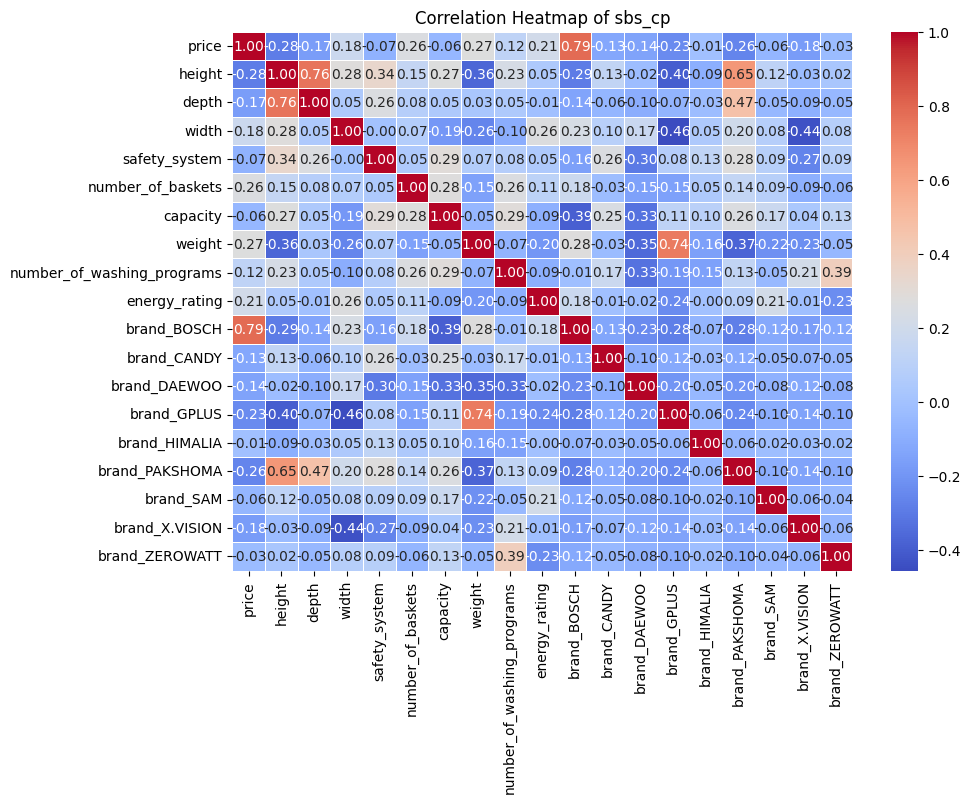

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = dw_cp.corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Title
plt.title("Correlation Heatmap of sbs_cp")

# Show plot
plt.show()


In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Assuming df is your dataframe
scaler =StandardScaler()
df_scaled = scaler.fit_transform(dw_cp)


finding number of cluster for kmeans with elbow method

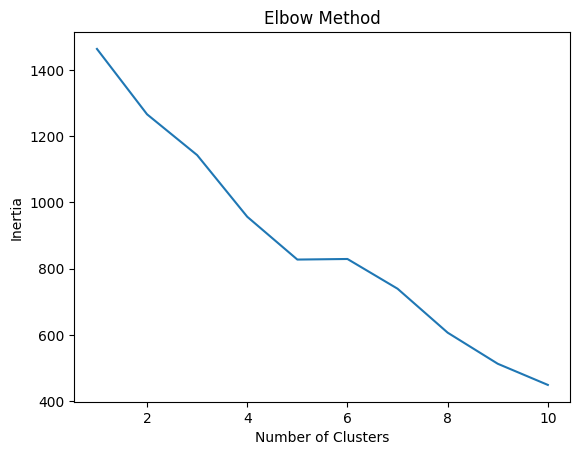

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [63]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
kmeans = KMeans(n_clusters=6, random_state=42)
dw['cluster'] = kmeans.fit_predict(df_scaled)
# internal Evaluation Metrics
score = silhouette_score(df_scaled, dw['cluster'])  # X = dataset, labels = cluster assignments
print(f"Silhouette Score: {score:.3f}") #Closer to 1 → Well-defined clusters

dbi = davies_bouldin_score(df_scaled, dw['cluster'])
print(f"Davies-Bouldin Index: {dbi:.3f}") #Lower values indicate better clustering.

ch = calinski_harabasz_score(df_scaled, dw['cluster'])
print(f"Calinski-Harabasz Index: {ch:.3f}") #Higher values indicate better clustering.

# Add the cluster labels to the original dataframe
print(dw[['model_code', 'cluster']].head())


Silhouette Score: 0.340
Davies-Bouldin Index: 1.252
Calinski-Harabasz Index: 11.705
             model_code  cluster
0  BOSCH-DW-SMS-6HMW76Q        2
4   BOSCH-DW-SMS46NI10M        2
6   BOSCH-DW-SMS46NW10M        2
7   BOSCH-DW-SMS4ECI26E        2
8   BOSCH-DW-SMS4ECW26M        2


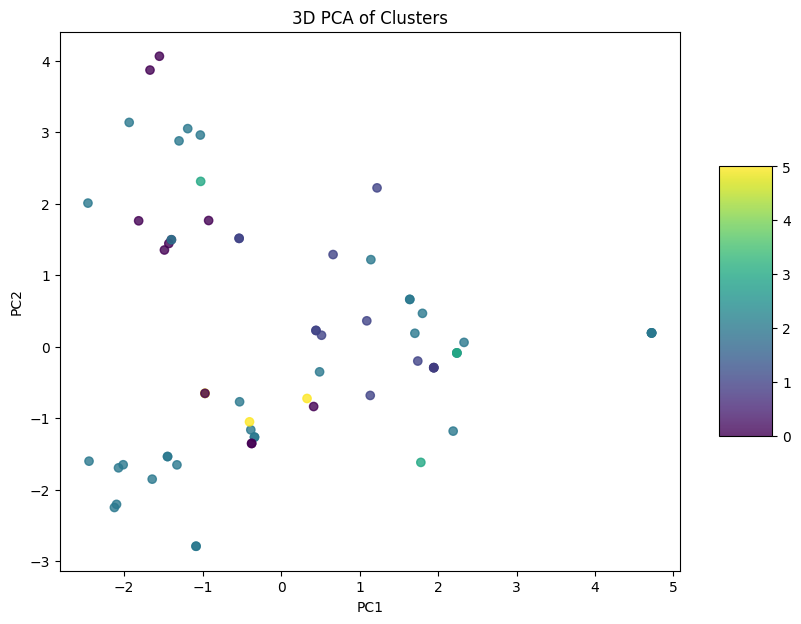

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Reduce to 3D for visualization
pca = PCA(n_components=2,svd_solver='full')
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame for the reduced features and cluster labels
df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca_df['cluster'] = dw['cluster']

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

# Scatter plot with cluster colors
scatter = ax.scatter(df_pca_df['PC1'], df_pca_df['PC2'], 
                     c=df_pca_df['cluster'], cmap='viridis', alpha=0.8)

# Labels and title
ax.set_title('3D PCA of Clusters')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Add color bar
plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)

# Show plot
plt.show()


<h1>DBSCAN</h1>

finding min_sample

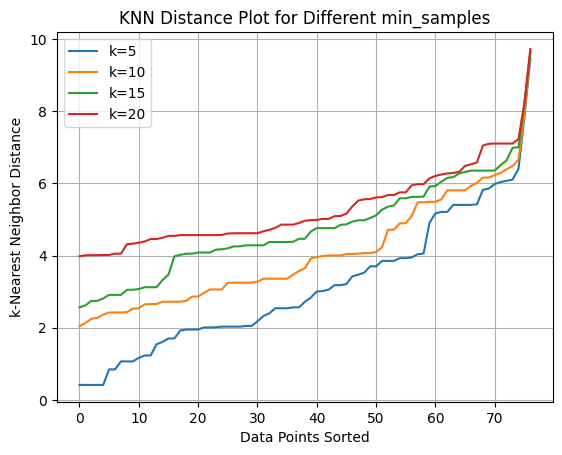

In [65]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

for k in [5,10,15,20]:  # Test different min_samples values
    nbrs = NearestNeighbors(n_neighbors=k).fit(df_scaled)
    distances, indices = nbrs.kneighbors(df_scaled)
    
    sorted_distances = np.sort(distances[:, k-1])  # k-th nearest neighbor
    plt.plot(sorted_distances, label=f'k={k}')

plt.xlabel("Data Points Sorted")
plt.ylabel("k-Nearest Neighbor Distance")
plt.title("KNN Distance Plot for Different min_samples")
plt.legend()
plt.grid()
plt.show()


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

# Apply DBSCAN
dbscan = DBSCAN(eps=3 ,min_samples=5)  # Adjust eps & min_samples as needed
dw['cluster_dbscan'] = dbscan.fit_predict(df_scaled)  # Assign cluster labels

score = silhouette_score(df_scaled, dw['cluster_dbscan'])  # X = dataset, labels = cluster assignments
print(f"Silhouette Score: {score:.3f}") #Closer to 1 → Well-defined clusters

dbi = davies_bouldin_score(df_scaled, dw['cluster_dbscan'])
print(f"Davies-Bouldin Index: {dbi:.3f}") #Lower values indicate better clustering.

ch = calinski_harabasz_score(df_scaled, dw['cluster_dbscan'])
print(f"Calinski-Harabasz Index: {ch:.3f}") #Higher values indicate better clustering.


Silhouette Score: 0.231
Davies-Bouldin Index: 2.078
Calinski-Harabasz Index: 7.940


In [ ]:
# sbs['best_dbscan']=best_labels

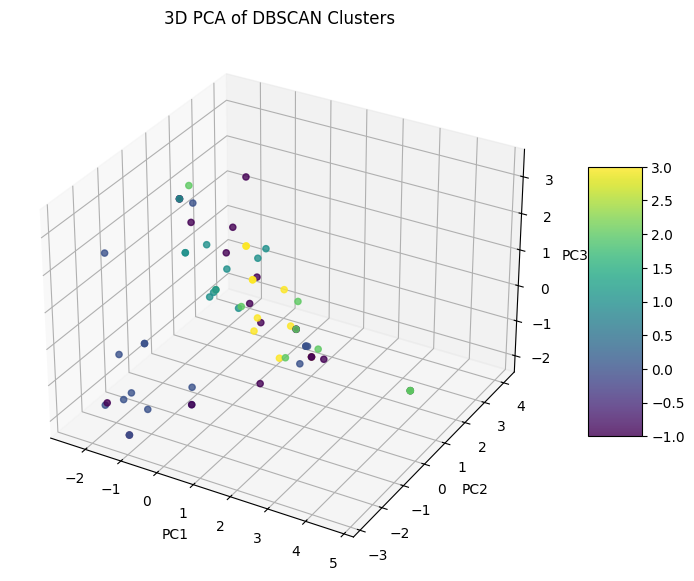

In [82]:
# Reduce to 3D for visualization using PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame for visualization
df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca_df['cluster'] = dw['cluster_dbscan']  # Add DBSCAN cluster labels

# Plot 3D Scatter
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot points, coloring them by cluster
scatter = ax.scatter(df_pca_df['PC1'], df_pca_df['PC2'], df_pca_df['PC3'], 
                     c=df_pca_df['cluster'], cmap='viridis', alpha=0.8)

# Labels and title
ax.set_title('3D PCA of DBSCAN Clusters')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add color bar
plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)

# Show plot
plt.show()


In [83]:
dw.cluster_dbscan.value_counts()

cluster_dbscan
-1    30
 0    16
 1    11
 2    10
 3    10
Name: count, dtype: int64

In [ ]:
from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# for k in range(2, 10):  # Try different k values
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     labels = kmeans.fit_predict(df_scaled)
#     score = silhouette_score(df_scaled, labels)
#     print(f'k={k}, Silhouette Score={score}')


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs


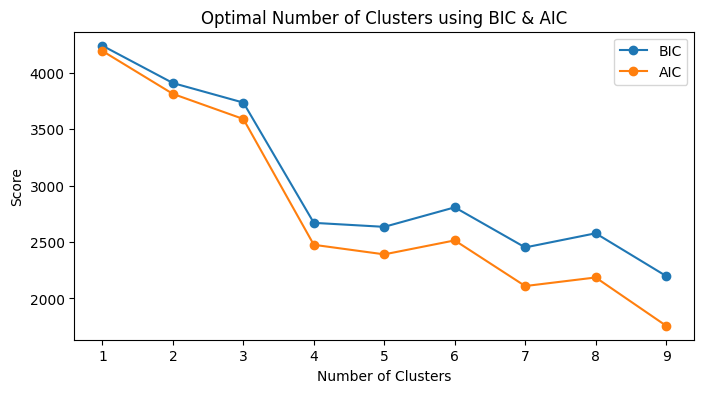

In [104]:
bic_scores = []
aic_scores = []
n_components_range = range(1, 10)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='spherical', random_state=42)
    gmm.fit(df_scaled)
    bic_scores.append(gmm.bic(df_scaled))
    aic_scores.append(gmm.aic(df_scaled))

# Plot BIC and AIC scores
plt.figure(figsize=(8, 4))
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.title('Optimal Number of Clusters using BIC & AIC')
plt.show()


Silhouette Score: 0.4424
Davies-Bouldin Index: 0.982
Calinski-Harabasz Index: 16.452


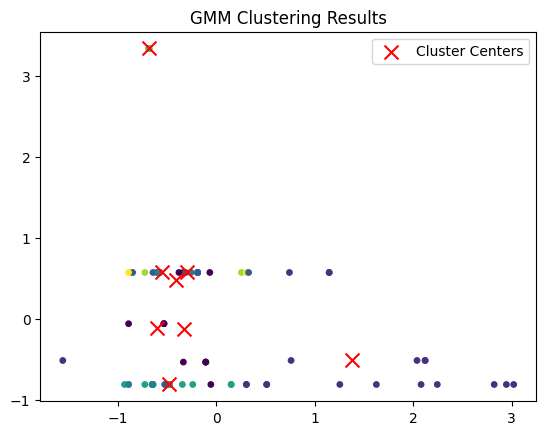

In [106]:
from sklearn.metrics import silhouette_score
# Fit GMM model
gmm = GaussianMixture(n_components=8, covariance_type='tied', random_state=42)
gmm.fit(df_scaled)

# Predict cluster labels
clusters = gmm.predict(df_scaled)

# Silhouette Score (Higher is better)
sil_score = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {sil_score:.4f}')
dbi = davies_bouldin_score(df_scaled, clusters)
print(f"Davies-Bouldin Index: {dbi:.3f}") #Lower values indicate better clustering.

ch = calinski_harabasz_score(df_scaled, clusters)
print(f"Calinski-Harabasz Index: {ch:.3f}") #Higher values indicate better clustering.

# Plot clustered data
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters, cmap='viridis', s=15)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title("GMM Clustering Results")
plt.legend()
plt.show()


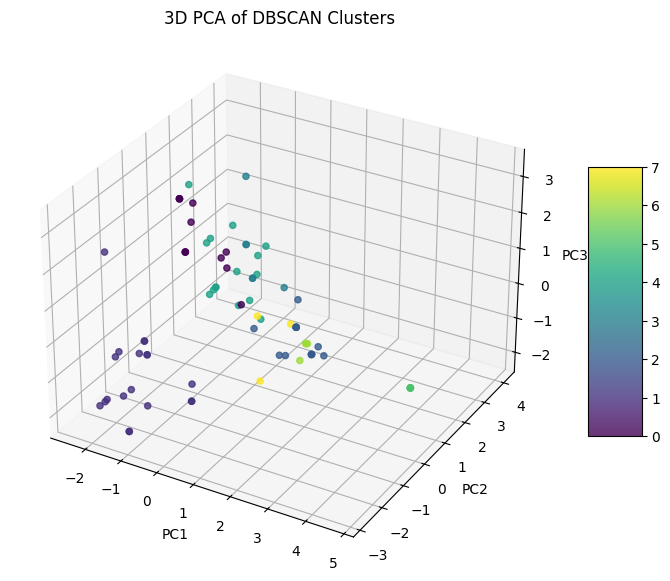

In [107]:
# Reduce to 3D for visualization using PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame for visualization
df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca_df['cluster'] = clusters # Add GMM cluster labels

# Plot 3D Scatter
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot points, coloring them by cluster
scatter = ax.scatter(df_pca_df['PC1'], df_pca_df['PC2'], df_pca_df['PC3'], 
                     c=df_pca_df['cluster'], cmap='viridis', alpha=0.8)

# Labels and title
ax.set_title('3D PCA of DBSCAN Clusters')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add color bar
plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)

# Show plot
plt.show()


In [91]:
# Get probability of each point belonging to clusters
probs = gmm.predict_proba(df_scaled)
print("Cluster Probabilities (First 5 points):\n", probs[:50])


Cluster Probabilities (First 5 points):
 [[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 

In [ ]:
df_scaled


(77, 19)

In [120]:
from itertools import combinations
best_score = -1
feature_indices = list(range(10))  # 11 features
# Try all combinations of 5 features out of 11
for feature_subset in combinations(feature_indices, 5):
    X_subset = df_scaled[:, feature_subset]  # Select features
    kmeans = KMeans(n_clusters=5, random_state=42).fit(X_subset)  # Assume 3 clusters
    score = silhouette_score(X_subset, kmeans.labels_)  # Measure clustering quality
    
    if score > best_score:
        best_score = score
        best_features = feature_subset

print("Best Feature Indices:", best_features)
print("Best Silhouette Score:", best_score)

Best Feature Indices: (1, 2, 3, 4, 9)
Best Silhouette Score: 0.6593245872881623


In [121]:
dw_cp

,price,height,depth,width,safety_system,number_of_baskets,capacity,weight,number_of_washing_programs,energy_rating,brand_BOSCH,brand_CANDY,brand_DAEWOO,brand_GPLUS,brand_HIMALIA,brand_PAKSHOMA,brand_SAM,brand_X.VISION,brand_ZEROWATT
0,44800000.0,85.0,60.0,60.0,1,3.0,14,55.307143,7.0,2.0,True,False,False,False,False,False,False,False,False
4,42000000.0,84.5,60.0,60.0,0,3.0,13,51.600000,8.0,2.0,True,False,False,False,False,False,False,False,False
6,42000000.0,84.5,60.0,60.0,0,3.0,13,51.600000,8.0,2.0,True,False,False,False,False,False,False,False,False
7,55500000.0,84.5,60.0,60.0,0,3.0,13,54.200000,6.0,2.0,True,False,False,False,False,False,False,False,False
8,51000000.0,84.5,60.0,60.0,0,3.0,13,57.400000,6.0,2.0,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,28700000.0,85.0,59.8,60.0,0,3.0,14,48.000000,8.0,2.0,False,False,False,False,False,False,False,True,False
91,32700000.0,85.0,60.0,59.8,0,3.0,14,43.500000,11.0,2.0,False,False,False,False,False,False,False,True,False
92,29444000.0,84.5,60.0,60.0,1,3.0,13,46.000000,8.0,2.0,False,False,False,False,False,False,False,False,True
93,32000000.0,85.0,60.0,60.0,0,3.0,15,50.500000,10.0,2.0,False,False,False,False,False,False,False,False,True


In [122]:
best_feature_names = [dw_cp.columns[i] for i in best_features]
best_feature_names

['height', 'depth', 'width', 'safety_system', 'energy_rating']

In [ ]:
df

In [ ]:
# Reduce to 3D for visualization using PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame for visualization
df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca_df['cluster'] = kmeans.labels_ # Add GMM cluster labels

# Plot 3D Scatter
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot points, coloring them by cluster
scatter = ax.scatter(df_pca_df['PC1'], df_pca_df['PC2'], df_pca_df['PC3'], 
                     c=df_pca_df['cluster'], cmap='viridis', alpha=0.8)

# Labels and title
ax.set_title('3D PCA of DBSCAN Clusters')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add color bar
plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)

# Show plot
plt.show()
